Лаборатроная работа **№3**

Выполнил студент группы 22.М07-мм


Захарова Оксана Михайловна 



Задача 3. **Многоклассовая классификация и множественная классификация/регрессия**

Задача
- [+] Изучите возможности sklearn для решения задач Multiclass classification, Multilabel classification и Multioutput Regression. Основные компоненты библиотеки указаны на рисунке ниже. multi_org_chart

- [+] Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.

- [+] Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

- [+] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

- [+] Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

- [+] Замерить время обучения каждой модели для каждой стратегии.

- [+] Для оценки качества моделей используйте метрику AUC-ROC.

- [+] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

- [] * (+3 балла) Повторить все пункты для задачи Multilabel classification (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать MultiOutputClassifier и ClassifierChain.

- [] * (+2 балла) Повторить все пункты для задачи Multioutput Regression (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: Ridge. В качестве стратегий попробовать MultiOutputRegressor и RegressorChain. В качестве метрики использовать R2.

**Описание датасета**

Необходимо определить вид животного, всего предствлено в датасете 7 видов - млекопитающие, птицы, рептилии, рыбы, амфибии, насекомые, беспозвоночные

Атрибуты:

1. Название животного
2. Волосы (шерсть)
3. Перья
4. Яйца (откладывает)
5. Молоко (кормит детей)
6. Находится в воздухе
7. Находится в воде
8. Хищник
9. Имеет зубы
10. Имеет позвоночник
11. Дышит
12. Ядовитый
13. Плавники
14. Количество ног
15. Хвост
16. Одомашненный
17. Кошачий размер
18. Тип класса (тип животного) - **целевой признак**

Датасет взят [отсюда](https://www.kaggle.com/datasets/uciml/zoo-animal-classification)


In [171]:
#Подключение библиотек
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Считывание данных

In [172]:
df = pd.read_csv("zoo.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Наличие пропусков

In [173]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

Пропусков нет

**Разведочный анализ (EDA)**

Значения целевого признака

In [174]:
df.class_type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

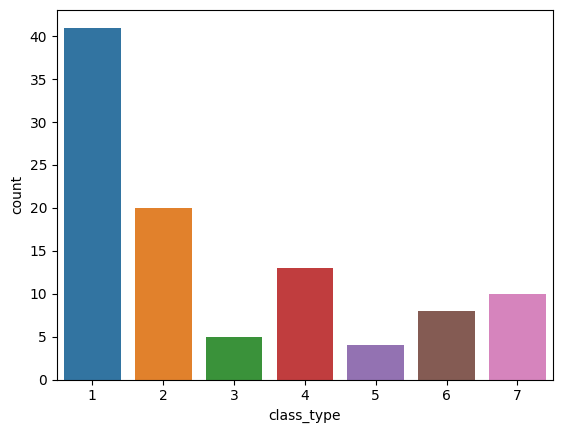

In [175]:
sns.countplot(x="class_type", data=df)
plt.show()

В данном датасете больше всего млекопитающих

Наименование животного никак не влияет на его тип. Поэтому можно удалить данный признак

In [176]:
df.drop(['animal_name'],axis=1, inplace=True)


In [177]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Категориальный признак legs

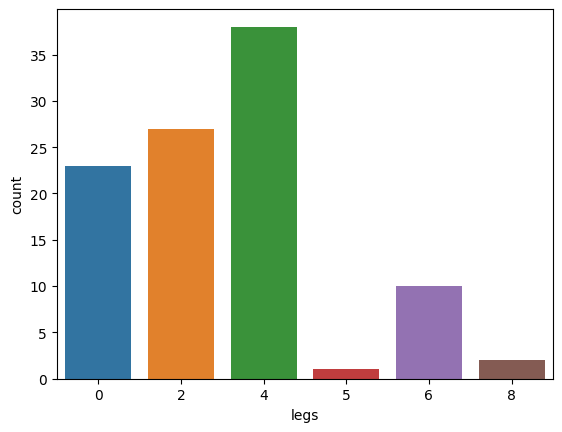

In [178]:
sns.countplot(x='legs', data=df)
plt.xlabel("legs")
plt.show()

Зависимость количества ног от типа животного

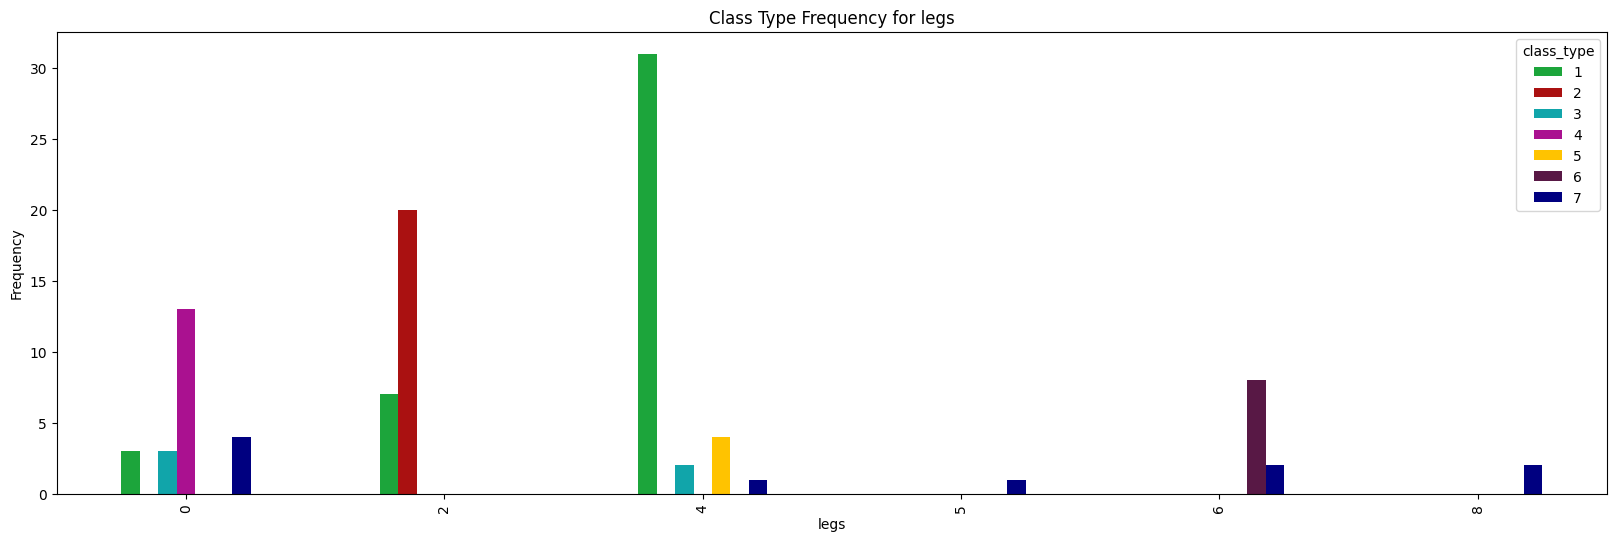

In [179]:
pd.crosstab(df.legs,df.class_type).plot(kind="bar", figsize=(20, 6), color=['#1CA53B', '#AA1111','#11A5AA','#AA1190','#FFC300','#581845','#000080' ])
plt.title('Class Type Frequency for legs')
plt.xlabel('legs')
plt.ylabel('Frequency')
plt.show()

4 ноги имеют животные, относящиеся к 4 из 7 классов, причем больше всего млекопитающих. Необходимо удалить данный признак, для этого сначала разделив признак legs на 6 признаков - legs0, legs2, legs4, legs5, legs6, legs8. Затем, удалить legs4.

Добавление новых признаков

In [180]:
df['legs0'] = 0 # заполняем сначала значения нового признака нулями
df['legs2'] = 0
df['legs4'] = 0
df['legs5'] = 0
df['legs6'] = 0
df['legs8'] = 0 
df.loc[(df['legs']==0), 'legs0'] = 1  # далле разбиваем на 6 категорий
df.loc[(df['legs']==2), 'legs2'] = 1
df.loc[(df['legs']==4), 'legs4'] = 1
df.loc[(df['legs']==5), 'legs5'] = 1
df.loc[(df['legs']==6), 'legs6'] = 1
df.loc[(df['legs']==8), 'legs8'] = 1
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,class_type,legs0,legs2,legs4,legs5,legs6,legs8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0


In [181]:
df.drop(['legs4'],axis=1, inplace=True)
df.drop(['legs'],axis=1,inplace=True)

In [182]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,class_type,legs0,legs2,legs5,legs6,legs8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,1,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,4,1,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,1,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,1,0,0,0,0,0


Зависимость наличия позоночника от типа животного

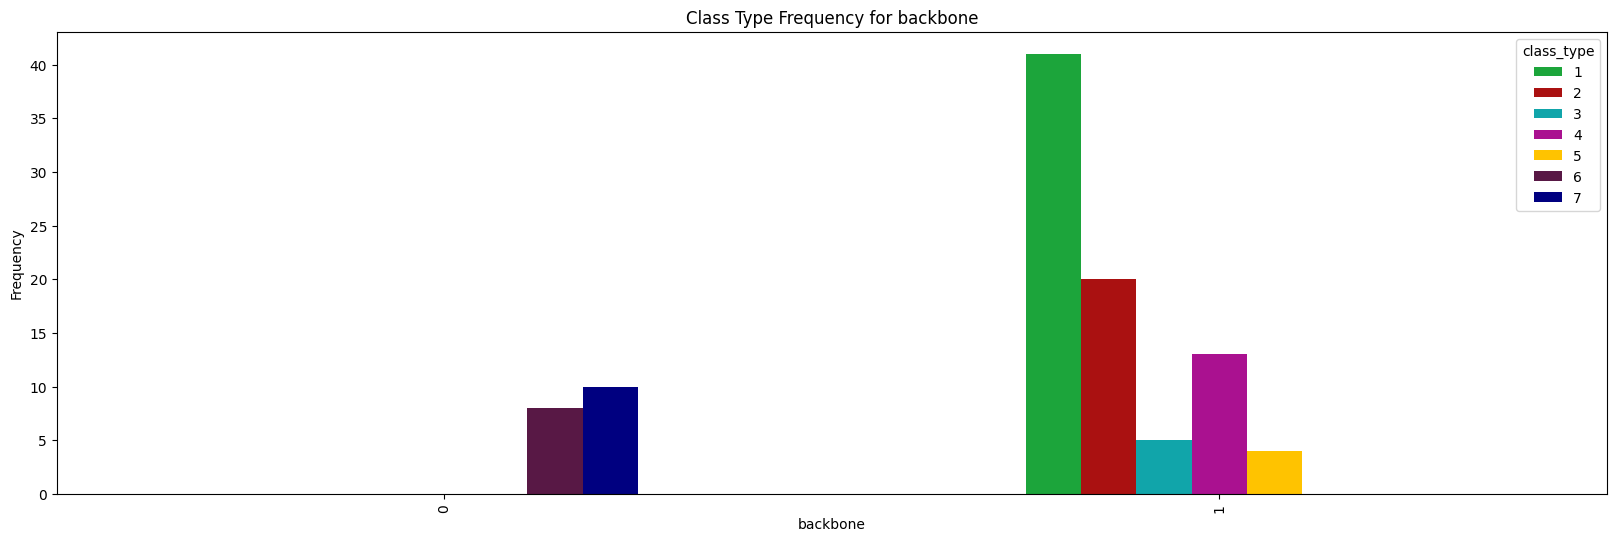

In [183]:
pd.crosstab(df.backbone,df.class_type).plot(kind="bar", figsize=(20, 6), color=['#1CA53B', '#AA1111','#11A5AA','#AA1190','#FFC300','#581845','#000080' ])
plt.title('Class Type Frequency for backbone')
plt.xlabel('backbone')
plt.ylabel('Frequency')
plt.show()

2 типа животных не имеют позвоночника

Корреляция признаков

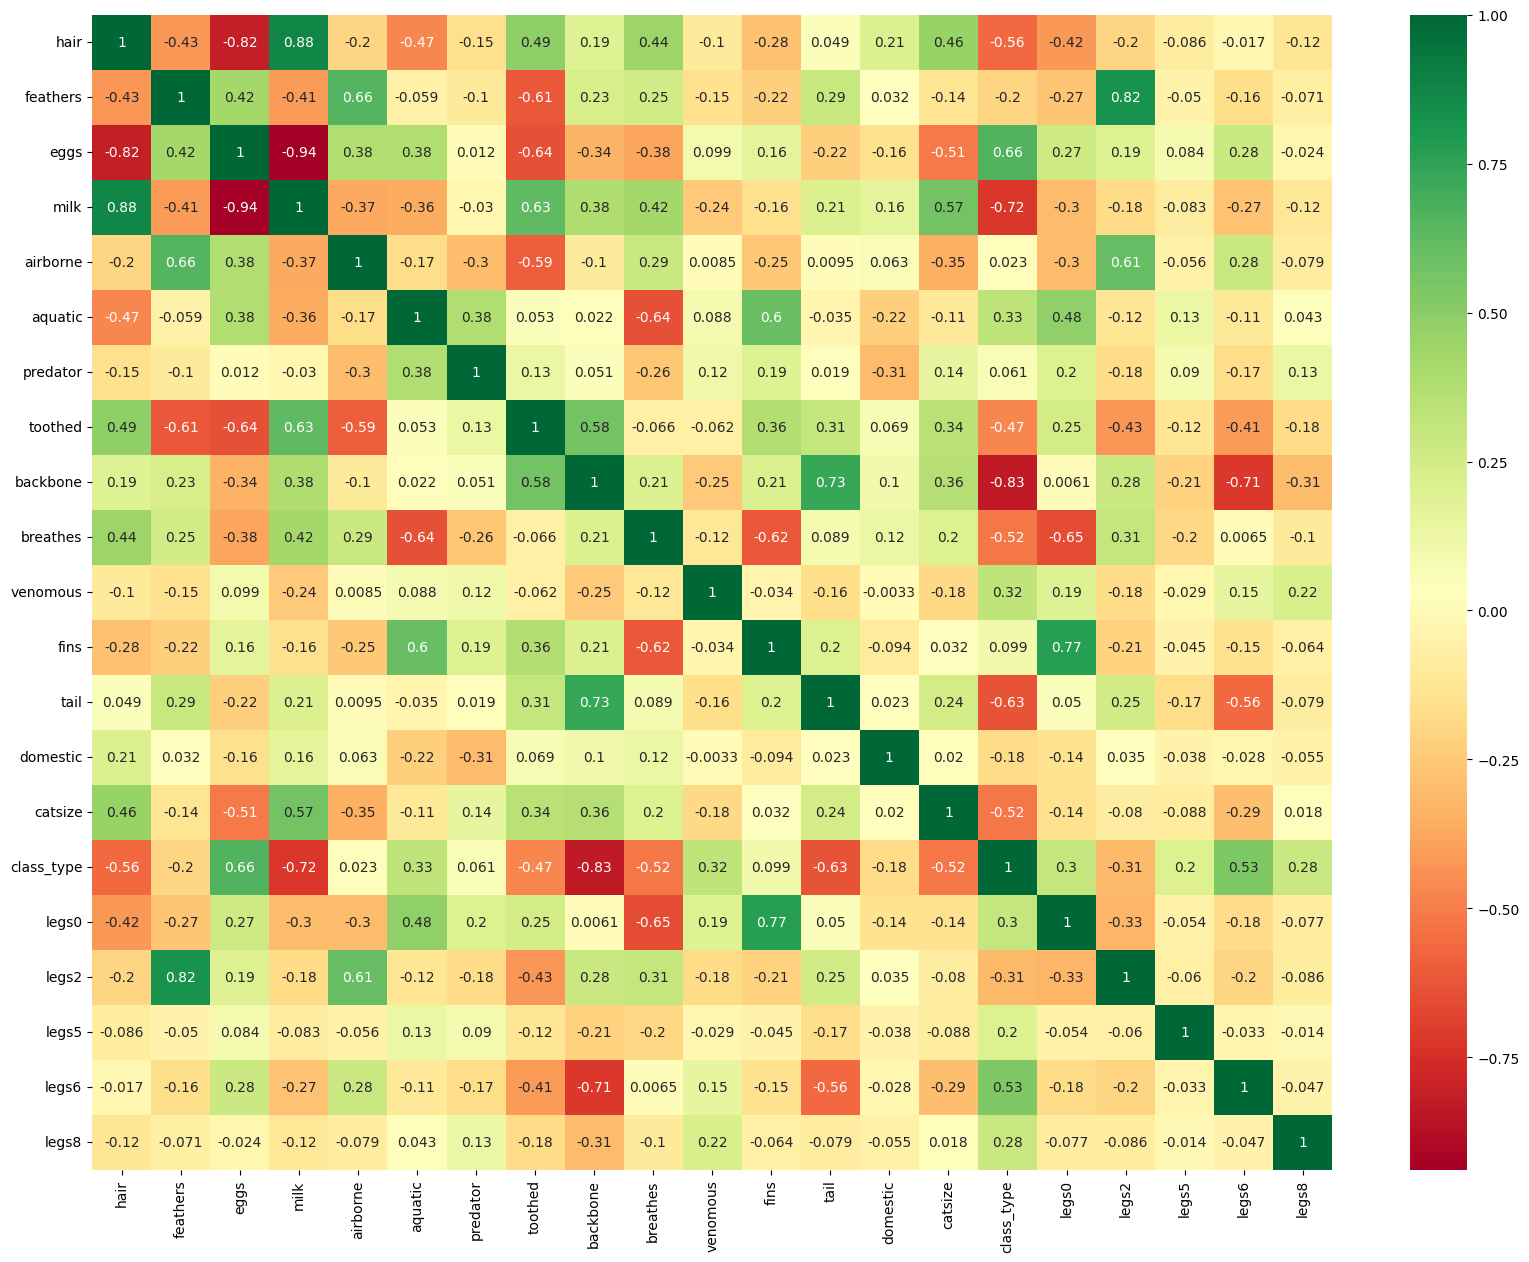

In [184]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.show()

Сильная корреляция наблюдается меджу целевым признаком и признаком backbone, на из ранних наблюдей его убрать нельзя

**Разбиение данных**

In [185]:
from sklearn.model_selection import train_test_split

y = df["class_type"]
X = df.drop(columns=["class_type"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Logistic Regression**

In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
import time
from sklearn.metrics import accuracy_score

classifier_lr = LogisticRegression()
pipeline = Pipeline([('scalar', StandardScaler()), ('model', LogisticRegression(random_state=40))])


parameters = { 'model__C' : np.arange(1e-05, 5, 0.1),
               'model__fit_intercept' : [True],
               'model__multi_class' : ['auto'],
               'model__tol' : [0.0001],
               'model__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'model__n_jobs' : [-1],
               'model__max_iter' : [500]
}

fold_number = 2

grid = GridSearchCV(pipeline, parameters, scoring = 'roc_auc', cv = fold_number)

OneVsRest

In [187]:
classifier = OneVsRestClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

lr_oneVsRest_time = end_time - start_time 
print(f'Training time: {lr_oneVsRest_time}')

y_train_pred = classifier.predict(X_train)
lr_oneVsRest_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {lr_oneVsRest_train_accuracy}')

y_test_pred = classifier.predict(X_test)
lr_oneVsRest_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {lr_oneVsRest_test_accuracy}')

Training time: 72.16719818115234
Train Accuracy: 0.5285714285714286
Test Accuracy: 0.5806451612903226


OneVsOne

In [188]:
classifier = OneVsOneClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

lr_oneVsOne_time = end_time - start_time 
print(f'Training time: {lr_oneVsOne_time}')

y_train_pred = classifier.predict(X_train)
lr_oneVsOne_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {lr_oneVsOne_train_accuracy}')

y_test_pred = classifier.predict(X_test)
lr_oneVsOne_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {lr_oneVsOne_test_accuracy}')

Training time: 101.51670598983765
Train Accuracy: 0.37142857142857144
Test Accuracy: 0.4838709677419355


OutputCode

In [189]:
classifier = OutputCodeClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

lr_outputCode_time = end_time - start_time 
print(f'Training time: {lr_outputCode_time}')

y_train_pred = classifier.predict(X_train)
lr_outputCode_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {lr_outputCode_train_accuracy}')

y_test_pred = classifier.predict(X_test)
lr_outputCode_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {lr_outputCode_test_accuracy}')

Training time: 73.17500829696655
Train Accuracy: 0.9
Test Accuracy: 0.8709677419354839


**svm**

In [190]:
from sklearn.svm import SVC

hyper_params_dict = { 
    'model__kernel' : ['sigmoid'],
    'model__C' : [1,10,100],
    'model__random_state' : [40]
}

fold_number = 2

pipeline = Pipeline([('scalar', StandardScaler()), ('model', SVC())])

grid = GridSearchCV(pipeline, hyper_params_dict, scoring = 'roc_auc', cv = fold_number)

OneVsRest

In [191]:
classifier = OneVsRestClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

svm_oneVsRest_time = end_time - start_time 
print(f'Training time: {svm_oneVsRest_time}')

y_train_pred = classifier.predict(X_train)
svm_oneVsRest_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {svm_oneVsRest_train_accuracy}')

y_test_pred = classifier.predict(X_test)
svm_oneVsRest_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {svm_oneVsRest_test_accuracy}')

Training time: 0.564647912979126
Train Accuracy: 0.9428571428571428
Test Accuracy: 0.8064516129032258


OneVsOne

In [192]:
classifier = OneVsOneClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

svm_oneVsOne_time = end_time - start_time 
print(f'Training time: {svm_oneVsOne_time}')

y_train_pred = classifier.predict(X_train)
svm_oneVsOne_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {svm_oneVsOne_train_accuracy}')

y_test_pred = classifier.predict(X_test)
svm_oneVsOne_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {svm_oneVsOne_test_accuracy}')

Training time: 1.1342947483062744
Train Accuracy: 1.0
Test Accuracy: 0.967741935483871


OutputCode

In [193]:
classifier = OutputCodeClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

svm_outputCode_time = end_time - start_time 
print(f'Training time: {svm_outputCode_time}')

y_train_pred = classifier.predict(X_train)
svm_outputCode_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {svm_outputCode_train_accuracy}')

y_test_pred = classifier.predict(X_test)
svm_outputCode_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {svm_outputCode_test_accuracy}')

Training time: 1.4491009712219238
Train Accuracy: 0.9142857142857143
Test Accuracy: 0.7096774193548387


**knn**

In [194]:
from sklearn.neighbors import KNeighborsClassifier

hyper_params_dict = { 
    'model__n_neighbors': [1, 2],
    'model__leaf_size': [20, 40, 60, 80],
    'model__weights': ['distance', 'uniform'],
    'model__n_jobs': [-1]
}

fold_number = 2

pipeline = Pipeline([('scalar', StandardScaler()), ('model', KNeighborsClassifier())])

grid = GridSearchCV(pipeline, hyper_params_dict, scoring = 'roc_auc', cv = fold_number)

OneVsRest


In [195]:
classifier = OneVsRestClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

knn_oneVsRest_time = end_time - start_time 
print(f'Training time: {knn_oneVsRest_time}')

y_train_pred = classifier.predict(X_train)
knn_oneVsRest_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {knn_oneVsRest_train_accuracy}')

y_test_pred = classifier.predict(X_test)
knn_oneVsRest_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {knn_oneVsRest_test_accuracy}')

Training time: 4.239365577697754
Train Accuracy: 1.0
Test Accuracy: 0.9354838709677419


OneVsOne


In [196]:
classifier = OneVsOneClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

knn_oneVsOne_time = end_time - start_time 
print(f'Training time: {knn_oneVsOne_time}')

y_train_pred = classifier.predict(X_train)
knn_oneVsOne_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {knn_oneVsOne_train_accuracy}')

y_test_pred = classifier.predict(X_test)
knn_oneVsOne_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {knn_oneVsOne_test_accuracy}')


Training time: 7.582286834716797
Train Accuracy: 1.0
Test Accuracy: 0.9032258064516129


OutputCode

In [197]:
classifier = OutputCodeClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

knn_outputCode_time = end_time - start_time 
print(f'Training time: {knn_outputCode_time}')

y_train_pred = classifier.predict(X_train)
knn_outputCode_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {knn_outputCode_train_accuracy}')

y_test_pred = classifier.predict(X_test)
knn_outputCode_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {knn_outputCode_test_accuracy}')

Training time: 6.074224233627319
Train Accuracy: 1.0
Test Accuracy: 0.9354838709677419


**naive bayes**

In [198]:
from sklearn.naive_bayes import GaussianNB


parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
grid = GridSearchCV(GaussianNB(), parameters, scoring='roc_auc', cv = 2)

OneVsRest


In [199]:
classifier = OneVsRestClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

nb_oneVsRest_time = end_time - start_time 
print(f'Training time: {nb_oneVsRest_time}')

y_train_pred = classifier.predict(X_train)
nb_oneVsRest_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {nb_oneVsRest_train_accuracy}')

y_test_pred = classifier.predict(X_test)
nb_oneVsRest_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {nb_oneVsRest_test_accuracy}')

Training time: 12.128466606140137
Train Accuracy: 0.9714285714285714
Test Accuracy: 0.9032258064516129


OneVsOne


In [200]:
classifier = OneVsOneClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

nb_oneVsOne_time = end_time - start_time 
print(f'Training time: {nb_oneVsOne_time}')

y_train_pred = classifier.predict(X_train)
nb_oneVsOne_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {nb_oneVsOne_train_accuracy}')

y_test_pred = classifier.predict(X_test)
nb_oneVsOne_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {nb_oneVsOne_test_accuracy}')

Training time: 12.448521614074707
Train Accuracy: 1.0
Test Accuracy: 0.9354838709677419


OutputCode

In [201]:
classifier = OutputCodeClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

nb_outputCode_time = end_time - start_time 
print(f'Training time: {nb_outputCode_time}')

y_train_pred = classifier.predict(X_train)
nb_outputCode_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {nb_outputCode_train_accuracy}')

y_test_pred = classifier.predict(X_test)
nb_outputCode_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {nb_outputCode_test_accuracy}')

Training time: 12.362319231033325
Train Accuracy: 0.9285714285714286
Test Accuracy: 0.9032258064516129


**decision tree**

In [202]:
from sklearn.tree import DecisionTreeClassifier

hyper_params_dict = {
     "model__max_depth": np.arange(1,21),
     "model__criterion": ["gini"],
}

fold_number = 2

pipeline = Pipeline([('scalar', StandardScaler()), ('model', DecisionTreeClassifier())])

grid = GridSearchCV(pipeline, hyper_params_dict, scoring = 'roc_auc', cv = fold_number)

OneVsRest


In [203]:
classifier = OneVsRestClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

dt_oneVsRest_time = end_time - start_time 
print(f'Training time: {dt_oneVsRest_time}')

y_train_pred = classifier.predict(X_train)
dt_oneVsRest_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {dt_oneVsRest_train_accuracy}')

y_test_pred = classifier.predict(X_test)
dt_oneVsRest_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {dt_oneVsRest_test_accuracy}')

Training time: 2.695329189300537
Train Accuracy: 0.9857142857142858
Test Accuracy: 0.8387096774193549


OneVsOne


In [204]:
classifier = OneVsOneClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

dt_oneVsOne_time = end_time - start_time 
print(f'Training time: {dt_oneVsOne_time}')

y_train_pred = classifier.predict(X_train)
dt_oneVsOne_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {dt_oneVsOne_train_accuracy}')

y_test_pred = classifier.predict(X_test)
dt_oneVsOne_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {dt_oneVsOne_test_accuracy}')

Training time: 3.8546078205108643
Train Accuracy: 1.0
Test Accuracy: 0.967741935483871


OutputCode

In [205]:
classifier = OutputCodeClassifier(grid)

start_time = time.time()
classifier.fit(X_train, y_train.ravel())
end_time = time.time()

dt_outputCode_time = end_time - start_time 
print(f'Training time: {dt_outputCode_time}')

y_train_pred = classifier.predict(X_train)
dt_outputCode_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {dt_outputCode_train_accuracy}')

y_test_pred = classifier.predict(X_test)
dt_outputCode_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {dt_outputCode_test_accuracy}')

Training time: 3.9037609100341797
Train Accuracy: 1.0
Test Accuracy: 0.9354838709677419


**Таблица сравнни точности**

In [206]:
table = {
    'stratagies\methods': ['OneVsRest', 'OneVsOne', 'OutputCode'],
    'lr train':[lr_oneVsRest_train_accuracy, lr_oneVsOne_train_accuracy, lr_outputCode_train_accuracy],
    'lr test': [lr_oneVsRest_test_accuracy, lr_oneVsOne_test_accuracy, lr_outputCode_test_accuracy],
    'svm train': [svm_oneVsRest_train_accuracy, svm_oneVsOne_train_accuracy, svm_outputCode_train_accuracy],
    'svm test': [svm_oneVsRest_test_accuracy, svm_oneVsOne_test_accuracy, svm_outputCode_test_accuracy],
    'knn train':[knn_oneVsRest_train_accuracy, knn_oneVsOne_train_accuracy, knn_outputCode_train_accuracy],
    'knn test': [knn_oneVsRest_test_accuracy,knn_oneVsOne_test_accuracy, knn_outputCode_test_accuracy],
    'nb train': [nb_oneVsRest_train_accuracy, nb_oneVsOne_train_accuracy, nb_outputCode_train_accuracy],
    'nb test': [nb_oneVsRest_test_accuracy, nb_oneVsOne_test_accuracy, nb_outputCode_test_accuracy],
    'dt train':[dt_oneVsRest_train_accuracy, dt_oneVsOne_train_accuracy, dt_outputCode_train_accuracy],
    'dt test': [dt_oneVsRest_test_accuracy, dt_oneVsOne_test_accuracy, dt_outputCode_test_accuracy],
}

pd.DataFrame(data=table)

,stratagies\methods,lr train,lr test,svm train,svm test,knn train,knn test,nb train,nb test,dt train,dt test
0,OneVsRest,0.528571,0.580645,0.942857,0.806452,1.0,0.935484,0.971429,0.903226,0.985714,0.838710
1,OneVsOne,0.371429,0.483871,1.000000,0.967742,1.0,0.903226,1.000000,0.935484,1.000000,0.967742
2,OutputCode,0.900000,0.870968,0.914286,0.709677,1.0,0.935484,0.928571,0.903226,1.000000,0.935484


**Таблица сравнения скорости**

In [207]:
table = {
    'stratagies\methods': ['OneVsRest', 'OneVsOne', 'OutputCode'],
    'lr train':[lr_oneVsRest_time, lr_oneVsOne_time, lr_outputCode_time],
    'svm train': [svm_oneVsRest_time, svm_oneVsOne_time, svm_outputCode_time],
    'knn train':[knn_oneVsRest_time, knn_oneVsOne_time, knn_outputCode_time],
    'nb train': [nb_oneVsRest_time, nb_oneVsOne_time, nb_outputCode_time],
    'dt train':[dt_oneVsRest_time, dt_oneVsOne_time, dt_outputCode_time],
}

pd.DataFrame(data=table)

,stratagies\methods,lr train,svm train,knn train,nb train,dt train
0,OneVsRest,72.167198,0.564648,4.239366,12.128467,2.695329
1,OneVsOne,101.516706,1.134295,7.582287,12.448522,3.854608
2,OutputCode,73.175008,1.449101,6.074224,12.362319,3.903761


**Выводы**

Оптимальным по времени является стратегия OneVsRest для всех методов. Но по точности в большистве случаев выигрывает модель OneVsOne